<a href="https://colab.research.google.com/github/LeonardoMorales/Yoga-Pose-Estimation-ML/blob/main/Yoga_Pose_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Import NN layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt # for plotting data
import numpy as np # for math and arrays
import pandas as pd
import seaborn as sns # for plotting

In [22]:
tf.random.set_seed(13)
tf.debugging.set_log_device_placement(False)

In [23]:
all_ds = pd.read_csv('Test2_YogaPoses_Nums_Completed.csv')
all_ds

,POSE,LeftShoulderAngle,RightShoulderAngle,LeftElbowAngle,RightElbowAngle,LeftHipAngle,RightHipAngle,LeftKneeAngle,RightKneeAngle
0,0,8.533379,2.493388,155.628118,167.744911,65.308848,69.156519,8.163497,10.022567
1,0,4.083005,7.058673,162.490382,164.203458,86.062801,92.487008,19.074113,15.664330
2,0,10.713288,5.973813,160.446161,165.091847,85.984780,88.687401,18.324295,14.579814
3,0,10.192227,4.999405,146.517574,168.168232,66.525332,79.147658,11.740945,14.509123
4,0,6.541231,14.255083,153.434766,177.832598,97.035200,77.687719,25.451624,19.056081
...,...,...,...,...,...,...,...,...,...
385,12,32.341280,34.697163,132.943775,133.399059,170.746287,165.237470,179.583760,179.296062
386,12,27.870505,26.599099,132.554728,133.879904,163.078430,169.962854,174.953182,179.924549
387,12,25.244714,24.815232,171.262694,171.958400,167.918958,166.584342,179.591163,177.714350
388,12,24.983732,18.345772,161.487519,179.777819,170.559495,168.409232,179.217187,177.440177


In [24]:
print(f'Humber of rows/examples and columns in the dataset: {all_ds.shape}')

Humber of rows/examples and columns in the dataset: (390, 9)


In [25]:
# Summary of information on the dataset
all_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSE                390 non-null    int64  
 1   LeftShoulderAngle   390 non-null    float64
 2   RightShoulderAngle  390 non-null    float64
 3   LeftElbowAngle      390 non-null    float64
 4   RightElbowAngle     390 non-null    float64
 5   LeftHipAngle        390 non-null    float64
 6   RightHipAngle       390 non-null    float64
 7   LeftKneeAngle       390 non-null    float64
 8   RightKneeAngle      390 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 27.5 KB


In [26]:
# Shuffle the rows to make sure the data is not sorted
all_ds = all_ds.sample(frac=1)
all_ds

,POSE,LeftShoulderAngle,RightShoulderAngle,LeftElbowAngle,RightElbowAngle,LeftHipAngle,RightHipAngle,LeftKneeAngle,RightKneeAngle
217,7,33.926369,32.894498,64.289388,61.492794,34.566536,40.702702,27.302240,31.114203
310,10,146.577075,156.132169,168.778527,177.996113,74.900053,61.453507,178.689237,167.879783
119,3,46.874690,48.863467,156.492069,155.947525,145.837817,143.222046,157.251923,162.841709
307,10,171.408983,171.105272,170.283122,177.042482,75.861613,80.894800,172.256059,178.247419
264,8,85.303435,119.225504,175.141613,178.938143,54.840327,164.113176,177.060910,168.460073
...,...,...,...,...,...,...,...,...,...
80,2,173.351120,176.467554,175.611499,175.274447,85.488581,90.581204,69.496372,59.966073
323,10,179.887471,177.738615,160.216967,170.406926,73.903630,77.278345,158.843098,157.475694
325,10,153.035306,172.168336,161.572431,178.443692,30.772420,36.932322,169.402161,162.438059
249,8,109.938465,93.527529,171.548565,164.393791,141.423756,67.646429,175.214464,162.555050


# Spit Data into Train/test split

In [27]:
# Split the data into 80% train and 20% test (later will divide the test to test and validate)
train_dataset, temp_test_dataset = train_test_split(all_ds, test_size=0.2)

print(train_dataset.shape)
print(temp_test_dataset.shape)

(312, 9)
(78, 9)


In [28]:
# Split the test_dataset dataframe to 50% test and 50% validation
test_dataset, validation_dataset = train_test_split(temp_test_dataset, test_size=0.5)

print(test_dataset.shape)
print(validation_dataset.shape)

(39, 9)
(39, 9)


In [29]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Train dataset     : {train_dataset.shape}")
print(f" Test  dataset     : {test_dataset.shape}")
print(f" Valid dataset     : {validation_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Train dataset     : (312, 9)
 Test  dataset     : (39, 9)
 Valid dataset     : (39, 9)


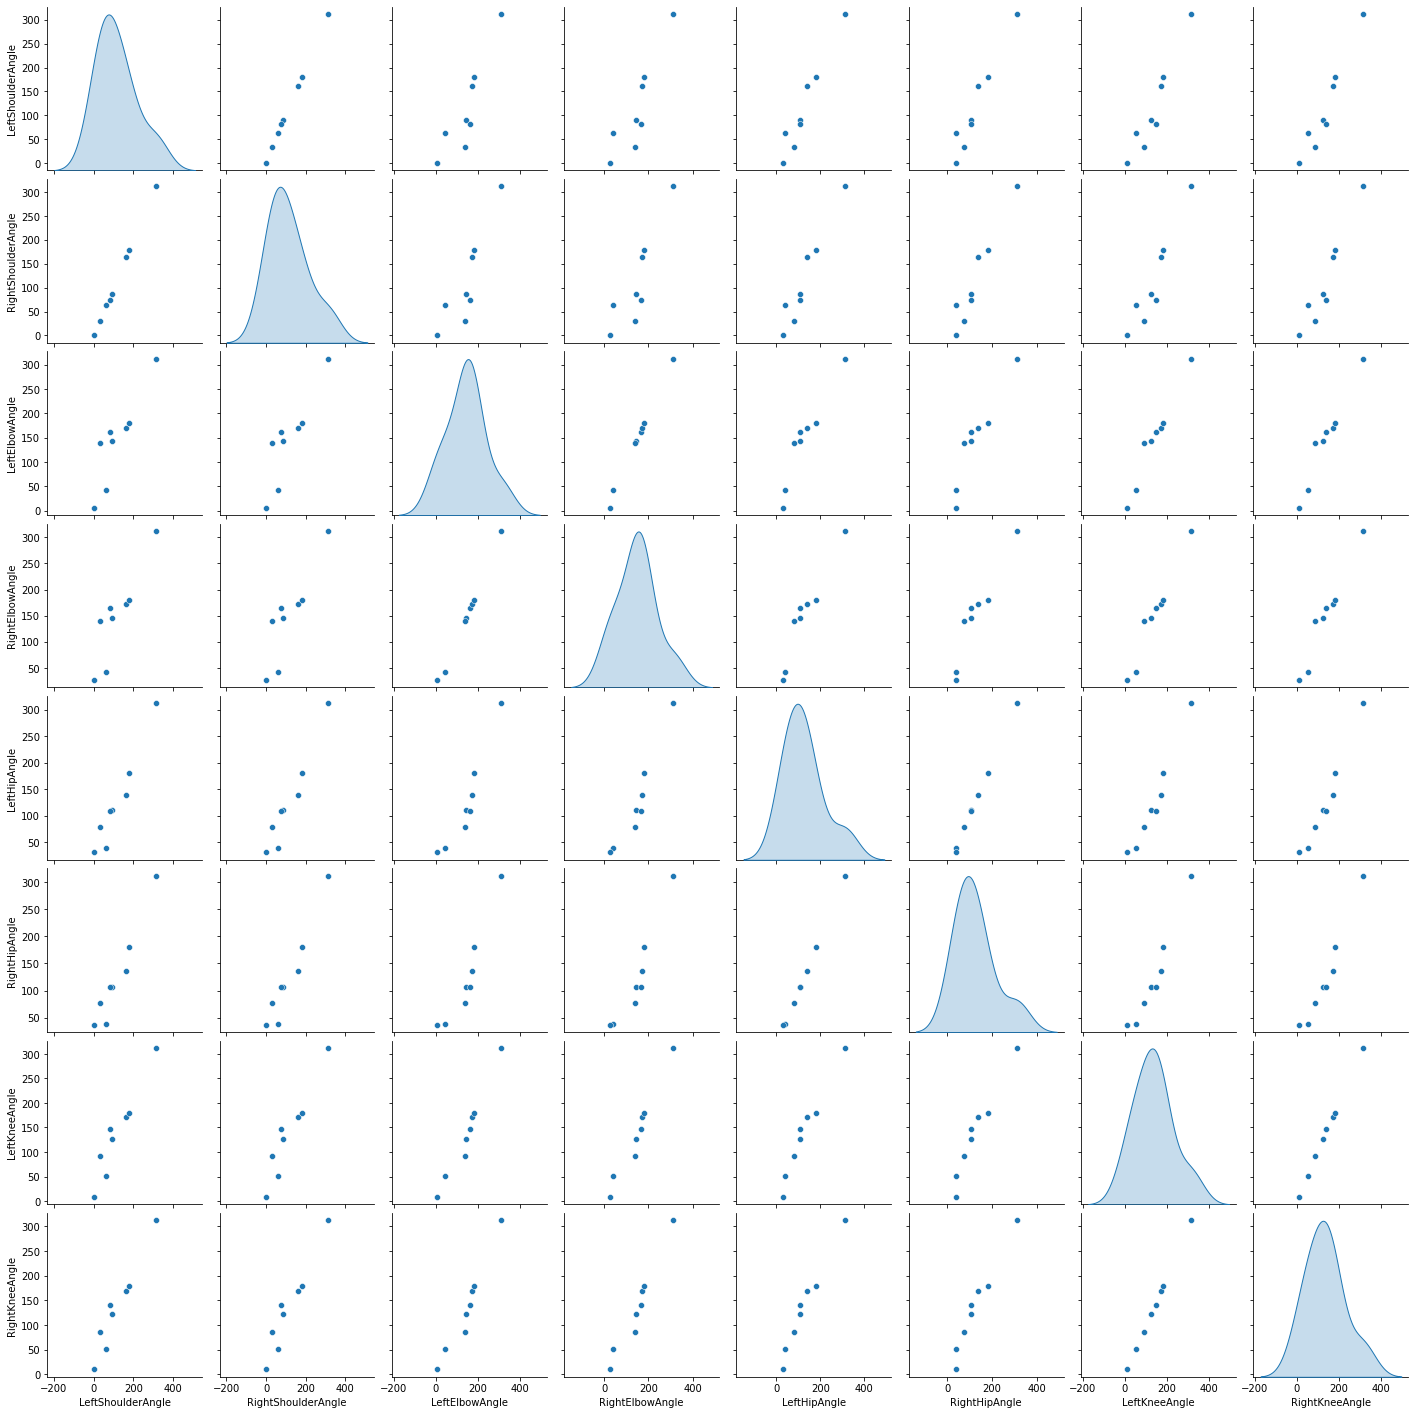

In [31]:
# Plot the relationship between each two variables to spot anything incorrect

train_stats = train_dataset.describe()
train_stats.pop("POSE")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde")

In [33]:
# Statisticson the train dataset to make sureit is in a good shape. (You may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("POSE")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
LeftShoulderAngle,312.0,90.511446,62.631959,0.026638,33.970832,81.346003,162.253937,179.887471
RightShoulderAngle,312.0,87.304560,62.840030,0.211121,30.139325,73.946244,163.353786,179.839577
LeftElbowAngle,312.0,143.492563,41.953382,6.561633,139.051905,160.889918,169.891243,179.984053
RightElbowAngle,312.0,145.329442,42.114162,26.953156,139.519541,164.985605,172.120501,179.647229
LeftHipAngle,312.0,110.322096,38.617462,30.772420,79.372667,108.878997,138.957228,179.954858
RightHipAngle,312.0,106.878733,38.017909,36.932322,76.642557,105.879738,136.701938,179.915150
LeftKneeAngle,312.0,125.627914,51.512992,8.163497,90.897906,147.208970,170.590187,179.754118
RightKneeAngle,312.0,122.488898,51.790517,10.022567,85.858700,139.619985,168.603017,179.790673


In [34]:
train_labels1 = train_dataset.pop("POSE")
test_labels1 = test_dataset.pop("POSE")
validation_labels1 = validation_dataset.pop("POSE")

In [35]:
train_labels = pd.get_dummies(train_labels1, prefix='Label')
test_labels = pd.get_dummies(test_labels1, prefix='Label')
valid_labels = pd.get_dummies(validation_labels1, prefix='Label')

train_labels

,Label_0,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9,Label_10,Label_11,Label_12
332,0,0,0,0,0,0,0,0,0,0,0,1,0
331,0,0,0,0,0,0,0,0,0,0,0,1,0
139,0,0,0,0,1,0,0,0,0,0,0,0,0
257,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,1,0,0,0,0,0,0,0,0,0,0
361,0,0,0,0,0,0,0,0,0,0,0,0,1
356,0,0,0,0,0,0,0,0,0,0,0,1,0
230,0,0,0,0,0,0,0,1,0,0,0,0,0


# Data Normalization/Scaling

## Substract the mean of the training data and divide by the standar deviation of the training data.

In [36]:
# Define a function to normalize the data set
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_validation_data = norm(validation_dataset)

In [37]:
# Show a sample of the data after normalization
normed_train_data.head(10)

,LeftShoulderAngle,RightShoulderAngle,LeftElbowAngle,RightElbowAngle,LeftHipAngle,RightHipAngle,LeftKneeAngle,RightKneeAngle
332,1.420006,1.250906,0.265431,0.801942,0.542158,0.367444,0.144097,0.363215
331,1.182605,1.267378,0.432401,0.468945,-0.065823,0.075227,-0.310441,-0.201293
139,1.135663,-0.625616,0.673499,0.525828,0.644261,-0.027756,-0.063449,0.968697
257,0.158980,0.534571,0.774516,0.594359,-1.242606,1.456702,0.766616,1.007507
1,-1.379942,-1.276987,0.452832,0.448163,-0.628195,-0.378551,-2.068484,-2.062628
282,1.292612,1.274960,0.014714,0.087940,-0.463360,0.423512,-0.580102,0.678585
113,-0.778019,-0.848354,0.723876,0.736256,0.335207,0.401025,0.718565,0.618478
335,0.421525,0.208011,-0.700799,-0.962243,1.182256,0.805776,0.925074,0.109752
98,-0.887020,-0.927707,0.110371,-0.222730,0.699030,0.893596,0.765017,0.734427
49,-0.178239,-0.266317,0.334498,0.262729,-0.365133,-0.186299,-0.763460,-0.704960
